# softmax


In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# load datasets

data_dir = Path("data")
easy_train = pd.read_csv(data_dir / "classification" / "easy-training.csv")
easy_test = pd.read_csv(data_dir / "classification" / "easy-test.csv")
rings_train = pd.read_csv(data_dir / "classification" / "rings3-regular-training.csv")
rings_test = pd.read_csv(data_dir / "classification" / "rings3-regular-test.csv")
xor_train = pd.read_csv(data_dir / "classification" / "xor3-training.csv")
xor_test = pd.read_csv(data_dir / "classification" / "xor3-test.csv")

# easy dataset

In [3]:
easy_train

,x,y,c
0,-72.829461,-40.239391,False
1,-65.464396,-60.501516,False
2,14.389589,74.223994,False
3,-92.335628,17.466916,False
4,-61.058421,-16.761820,False
...,...,...,...
495,96.279863,-95.125533,True
496,-41.625338,-48.713720,True
497,-64.545443,-91.317035,True
498,-27.066599,-89.894718,True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


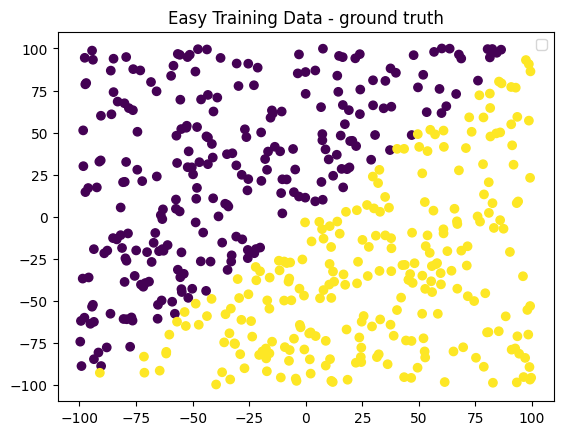

In [9]:
plt.scatter(easy_train.x, easy_train.y, c=easy_train.c)
plt.title("Easy Training Data - ground truth")
plt.legend()
plt.show()

In [5]:
layers = [
    #{"output_dim": 5, "activation": "relu", "init": "he"},
    # {"output_dim": 2, "activation": "softmax", "init": "normal"}
    {"output_dim": 1, "activation": "sigmoid", "init": "normal"}
]

mlp = networks.MLP(layers, input=easy_test[["x", "y"]].T, output_type="classification")


In [94]:
norm = networks.assets.Normalizator(easy_train[["x", "y"]])

train = norm(easy_train[["x", "y"]])
y_train = easy_train.c.values.reshape(-1, 1)
test = norm(easy_test[['x', 'y']])
y_test = easy_test.c.values.reshape(-1, 1)

In [95]:
layers = [
   # {"output_dim": 3, "activation": "relu", "init": "he"},
    {"output_dim": 1, "activation": "sigmoid", "init": "normal"}
]

mlp_no_softmax = networks.MLP(layers, input=train.T, output_type="regression")

Consider using the linear activation function for the output layer in regression problems.


In [96]:
max_epochs = 500

Epoch: 0, Loss: 0.29194047422979724
Epoch: 100, Loss: 0.12141277485999089
Epoch: 200, Loss: 0.11110088935103486
Epoch: 300, Loss: 0.11065195538847161
Epoch: 400, Loss: 0.1105828544944299


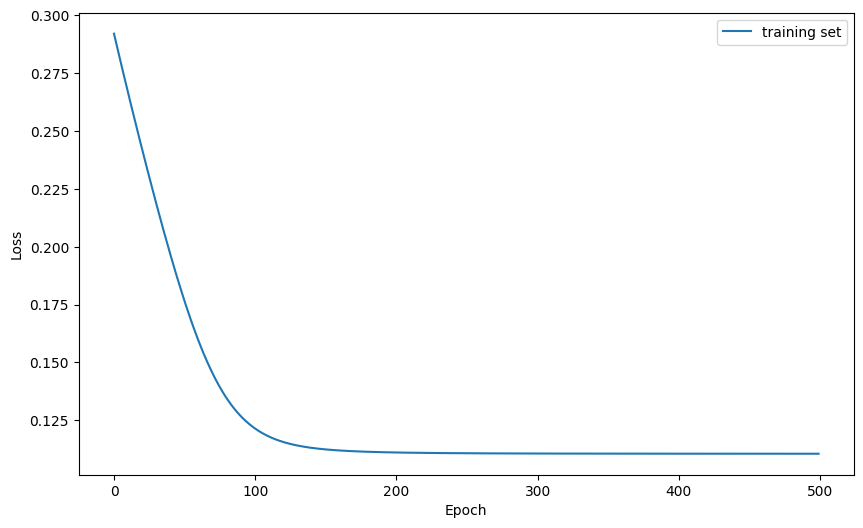

In [97]:
losses = mlp_no_softmax.train(train.T, y_train.T, max_epochs=max_epochs, learning_rate=0.01, batch_size=32)

Accuracy: 0.982


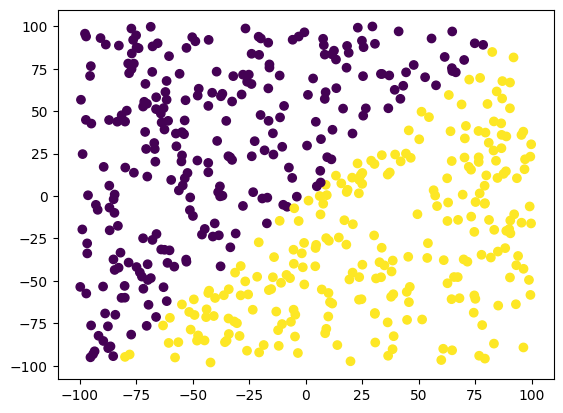

In [98]:
y_pred = mlp_no_softmax.predict(test.T) > 0.5


plt.scatter(easy_test.x, easy_test.y, c=y_pred)
print(f"Accuracy: {np.mean(y_pred.to_numpy().flatten() == y_test.flatten())}")
#print(f"Fscore on test set {mlp_no_softmax.Fscore(y_pred, y_test)}")

In [99]:
mlp_no_softmax.layers[0].activation

<function networks.activations.sigmoid(x)>

Epoch: 0, Loss: 1.0555607179557538
Epoch: 100, Loss: 0.12453068967623654
Epoch: 200, Loss: 0.09839486496547792
Epoch: 300, Loss: 0.08574913744268732
Epoch: 400, Loss: 0.07774362846060769
Epoch: 500, Loss: 0.0720292476092396
Epoch: 600, Loss: 0.06765907849366225
Epoch: 700, Loss: 0.06416307588580503
Epoch: 800, Loss: 0.06127606830751431
Epoch: 900, Loss: 0.058834810021785984
Epoch: 1000, Loss: 0.05673219785810726
Epoch: 1100, Loss: 0.05489446680033346
Epoch: 1200, Loss: 0.0532688289285618
Epoch: 1300, Loss: 0.05181631794982069
Epoch: 1400, Loss: 0.05050742310619562
Epoch: 1500, Loss: 0.04931930748793076
Epoch: 1600, Loss: 0.048233970637126686
Epoch: 1700, Loss: 0.04723699712174227
Epoch: 1800, Loss: 0.04631668145449497
Epoch: 1900, Loss: 0.045463402003811985
Epoch: 2000, Loss: 0.044669163958450414
Epoch: 2100, Loss: 0.04392725971557563
Epoch: 2200, Loss: 0.043232012492607594
Epoch: 2300, Loss: 0.04257857999941082
Epoch: 2400, Loss: 0.041962802162160966
Epoch: 2500, Loss: 0.0413810816330

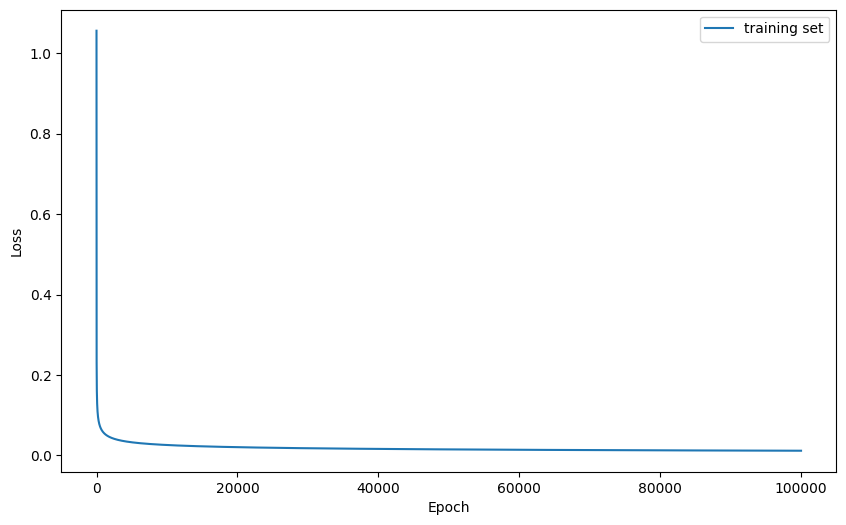

In [109]:
layers = [
    #{"output_dim": 5, "activation": "relu", "init": "he"},
    {"output_dim": 2, "activation": "softmax", "init": "normal"}
]

max_epochs = 100000

mlp = networks.MLP(layers, input=train.T, output_type="classification", regularization=None)

losses = mlp.train(train.T.to_numpy(), y_train.T, learning_rate=0.5, max_epochs=max_epochs, batch_size=1000)

loss: 0.011766952345973351


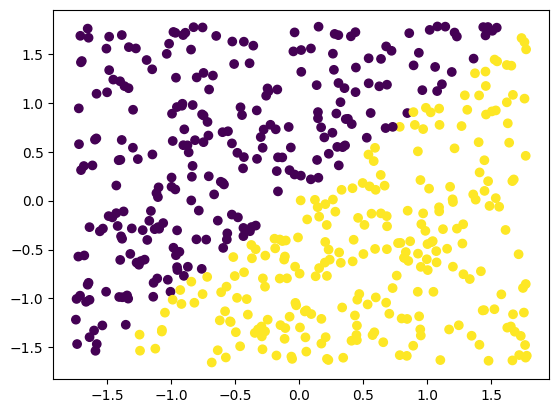

In [110]:
y_hat = mlp.predict(train.T)
print("loss:", mlp.calculate_loss(train.T, y_train.T))

plt.scatter(train.x, train.y, c=y_hat)

In [111]:
y_pred = mlp.full_forward_pass(test.T)
y_test_onehot = networks.assets.one_hot(y_test.T, 2)

print("Fscore on test set:", mlp.Fscore(y_pred, y_test_onehot))


Fscore on test set: 0.9903411499970268


In [113]:
y_pred_train = mlp.full_forward_pass(train.T)
y_train_onehot = networks.assets.one_hot(y_train.T, 2)

print("Fscore on train set:", mlp.Fscore(y_pred_train, y_train_onehot))

Fscore on train set: 0.9900847808492892


## rings3 

In [41]:
rings_train.c.value_counts()

c
0    500
1    500
2    500
Name: count, dtype: int64

In [42]:
rings_train

,x,y,c
0,-93.563317,-76.345110,0
1,1.060114,-16.727040,0
2,24.396099,40.358822,0
3,-94.595137,-97.889250,0
4,-85.331382,-56.736933,0
...,...,...,...
1495,-3.227585,-69.846357,2
1496,-82.598085,-51.758017,2
1497,-46.601078,-21.654871,2
1498,-59.106450,-44.528442,2


In [118]:
layers = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 3, "activation": "softmax", "init": "normal"}
]


norm = networks.assets.Normalizator(rings_train[["x", "y"]])

train = norm(rings_train[["x", "y"]])
y_train = rings_train.c.values.reshape(-1, 1)
test = norm(rings_test[['x', 'y']])
y_test = rings_test.c.values.reshape(-1, 1)

In [119]:
rings_train.shape

(1500, 3)

Epoch: 0, Loss: 1.3954022843087635
Epoch: 100, Loss: 0.46260515854457945
Epoch: 200, Loss: 0.4068289690914452
Epoch: 300, Loss: 0.3826859018931732
Epoch: 400, Loss: 0.3749336953820535
Epoch: 500, Loss: 0.36693223548866977
Epoch: 600, Loss: 0.36396756095361366
Epoch: 700, Loss: 0.36022717585798486
Epoch: 800, Loss: 0.3596032331378048
Epoch: 900, Loss: 0.36188390271839566
Epoch: 1000, Loss: 0.36463701647683494
Epoch: 1100, Loss: 0.3645294735038809
Epoch: 1200, Loss: 0.3629031006852388
Epoch: 1300, Loss: 0.36361918718453184
Epoch: 1400, Loss: 0.3651161913443866
Epoch: 1500, Loss: 0.3632656234492899
Epoch: 1600, Loss: 0.36304013497228177
Epoch: 1700, Loss: 0.3604479818726661
Epoch: 1800, Loss: 0.3547682092588764
Epoch: 1900, Loss: 0.34957395383320244
Epoch: 2000, Loss: 0.34128370529132696
Epoch: 2100, Loss: 0.33924842318618764
Epoch: 2200, Loss: 0.3406108815729476
Epoch: 2300, Loss: 0.3382849254358294
Epoch: 2400, Loss: 0.33543141303976276
Epoch: 2500, Loss: 0.33327369682741353
Epoch: 2600

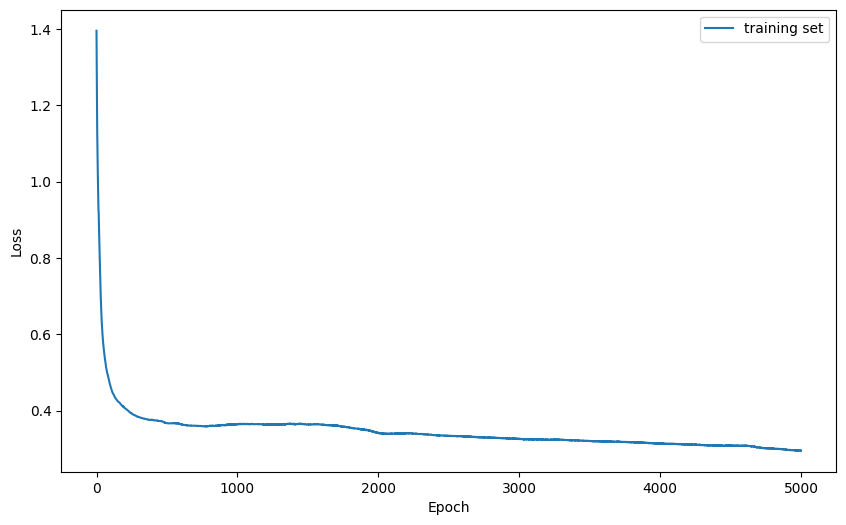

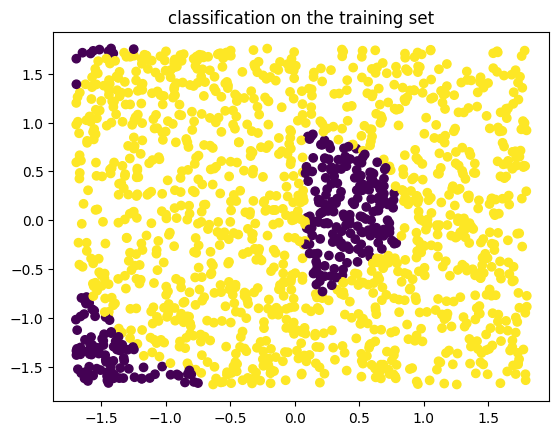

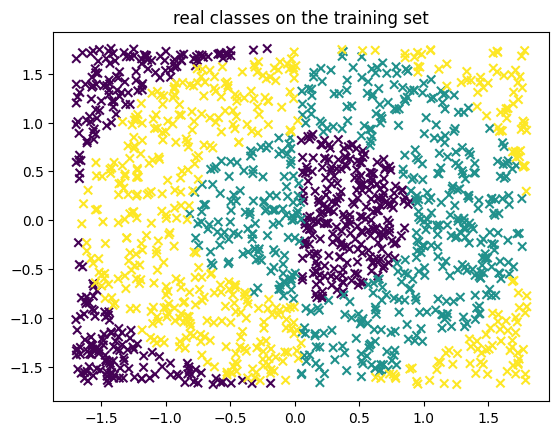

In [120]:
layers_mse = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 10, "activation": "relu", "init": "he"},
    {"output_dim": 1, "activation": "linear", "init": "normal"}
]


mlp_mse = networks.MLP(layers_mse, input=train.T, output_type="regression", regularization=None)
max_epochs = 5000

losses = mlp_mse.train(train.T, y_train.T, max_epochs=max_epochs, learning_rate=0.01, batch_size=32)



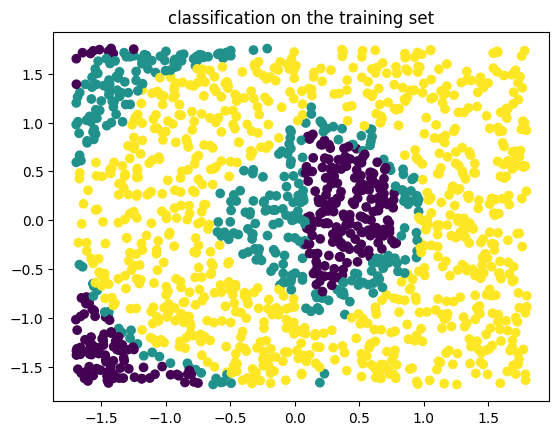

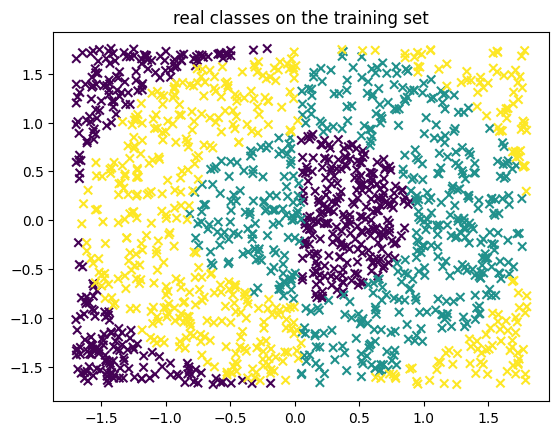

In [123]:

y_hat = round(mlp_mse.predict(train.T))
y_hat[y_hat == 3] = 2
plt.scatter(train.x, train.y, c=y_hat)
plt.title("classification on the training set with MSE loss")
plt.show()

plt.scatter(train.x, train.y, c=rings_train.c, marker="x")
plt.title("real classes on the training set")
plt.show()

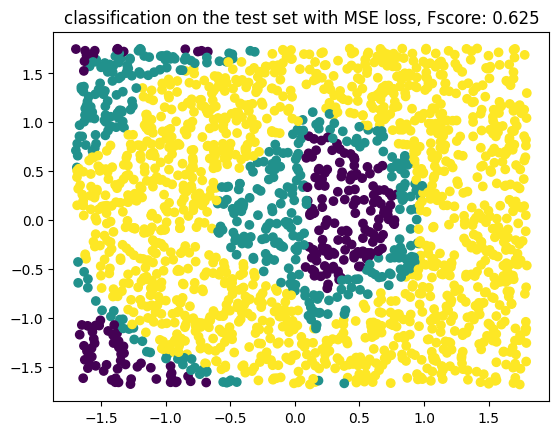

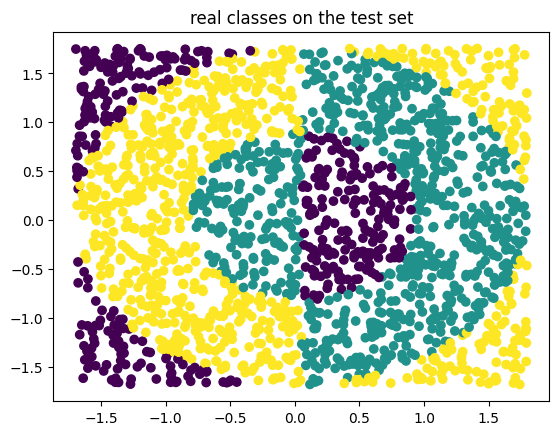

In [135]:
y_hat = np.rint(mlp_mse.predict(test.T.to_numpy()))
y_hat[y_hat == 3] = 2
plt.scatter(test.x, test.y, c=y_hat)
plt.title("classification on the test set with MSE loss, Fscore: 0.625")
plt.show()

plt.scatter(test.x, test.y, c=rings_test.c)
plt.title("real classes on the test set")
plt.show()


In [130]:
y_hat

array([[2., 2., 2., ..., 2., 0., 2.]])

In [ ]:
mlp_steps = networks.MLP(layers, input=train.T.to_numpy(), output_type="classification")

In [133]:

y_onehot_hat = networks.assets.one_hot(y_hat, 3)
y_test_onehot = networks.assets.one_hot(y_test.T, 3)

print("Fscore on test set:", mlp_steps.Fscore(y_onehot_hat, y_test_onehot))

Fscore on test set: 0.6025


Epoch: 0, Loss: 1.9905347098767345
Epoch: 100, Loss: 0.9173067222719418
Epoch: 200, Loss: 0.857360079495886
Epoch: 300, Loss: 0.8046444871632241
Epoch: 400, Loss: 0.7406715159052992
Epoch: 500, Loss: 0.6675050299334571
Epoch: 600, Loss: 0.6099591159098644
Epoch: 700, Loss: 0.5567776220087355
Epoch: 800, Loss: 0.4902763315027552
Epoch: 900, Loss: 0.4350052459417763
Epoch: 1000, Loss: 0.3784919918109011
Epoch: 1100, Loss: 0.3413216909034903
Epoch: 1200, Loss: 0.3102657663976907
Epoch: 1300, Loss: 0.283310515798504
Epoch: 1400, Loss: 0.2630176161700693
Epoch: 1500, Loss: 0.24718950623055078
Epoch: 1600, Loss: 0.2343452626254342
Epoch: 1700, Loss: 0.2234365480230862
Epoch: 1800, Loss: 0.21413144247470853
Epoch: 1900, Loss: 0.20544160472826659
Epoch: 2000, Loss: 0.19803908442909046
Epoch: 2100, Loss: 0.19144292091407117
Epoch: 2200, Loss: 0.18519865372867064
Epoch: 2300, Loss: 0.17885661250960214
Epoch: 2400, Loss: 0.173130046135638
Epoch: 2500, Loss: 0.1684066478620578
Epoch: 2600, Loss: 0

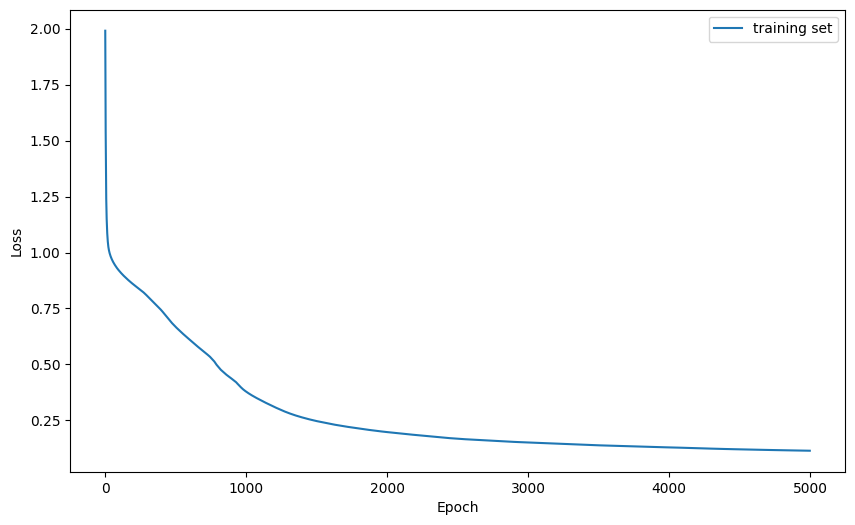

In [136]:
mlp_steps = networks.MLP(layers, input=train.T.to_numpy(), output_type="classification", regularization=None)

max_epochs = 5000

losses = mlp_steps.train(train.T.to_numpy(), y_train.T, learning_rate=0.001, max_epochs=max_epochs, batch_size=32)

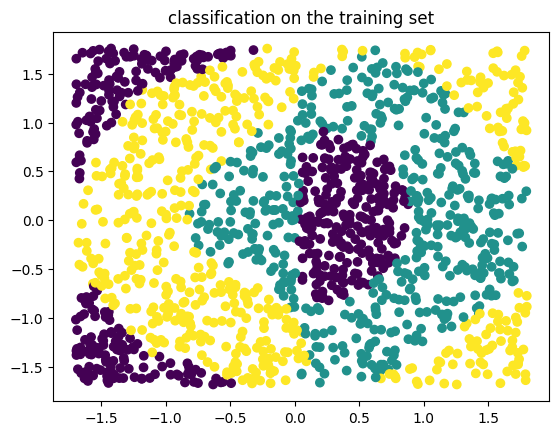

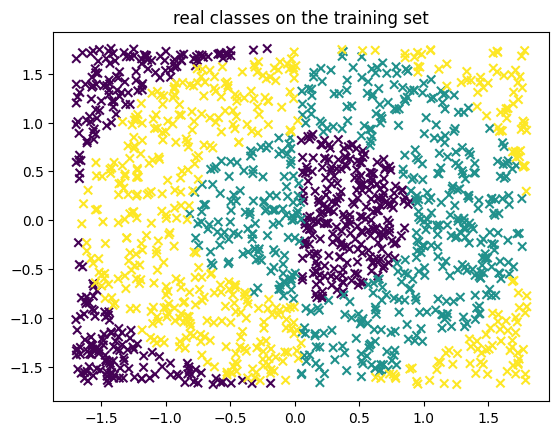

In [137]:
y_hat = mlp_steps.predict(train.T)
plt.scatter(train.x, train.y, c=y_hat)
plt.title("classification on the training set")
plt.show()

plt.scatter(train.x, train.y, c=rings_train.c, marker="x")

plt.title("real classes on the training set")
plt.show()

In [138]:
y_pred = mlp_steps.full_forward_pass(test.T)
print(y_pred.shape)
y_onehot = networks.assets.one_hot(y_test.T, 3)
print("Fscore on test set:", mlp_steps.Fscore(y_pred, y_onehot))

(3, 2000)
Fscore on test set: 0.9008927990625705


In [141]:
y_train_pred = mlp_steps.full_forward_pass(train.T)
y_train_onehot = networks.assets.one_hot(y_train.T, 3)
print("Fscore on train set:", mlp_steps.Fscore(y_train_pred, y_train_onehot))

Fscore on train set: 0.9173458566785675


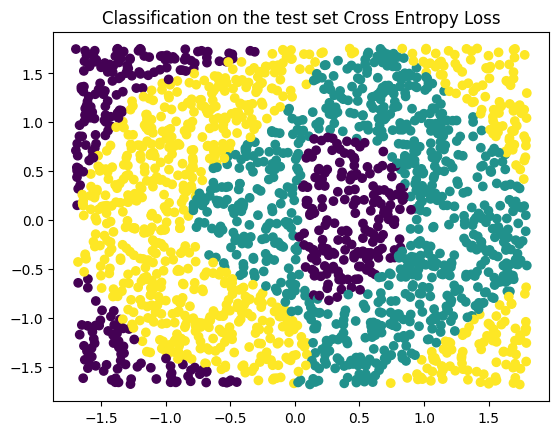

Text(0.5, 1.0, 'real classes on the test set')

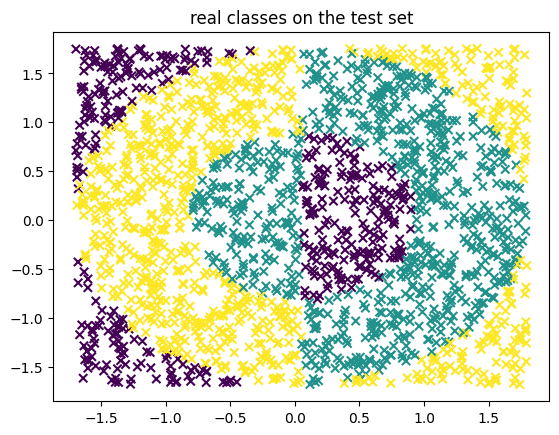

In [140]:


y_pred = mlp_steps.predict(test.T).flatten()
plt.scatter(test.x, test.y, c=y_pred)
plt.title("Classification on the test set Cross Entropy Loss")
plt.show()

plt.scatter(test.x, test.y, c=rings_test.c, marker="x")
plt.title("real classes on the test set")


# XOR

In [142]:
xor_train

,x,y,c
0,-5.720316,18.198653,0
1,50.039419,-71.390360,0
2,93.072781,-76.340256,0
3,10.434100,-21.863272,0
4,30.198218,-24.730234,0
...,...,...,...
495,-88.821359,14.624647,1
496,57.830467,12.097832,1
497,-31.530983,90.372797,1
498,-17.008097,65.769246,1


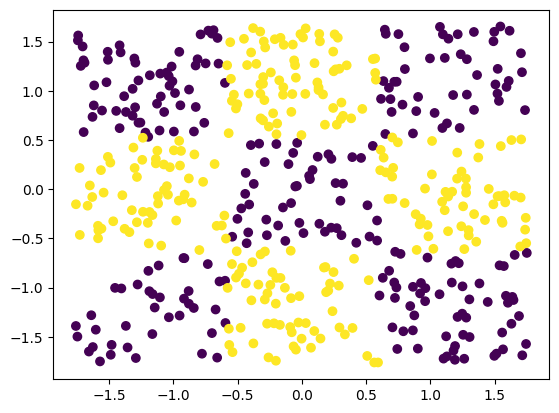

In [143]:

norm = networks.assets.Normalizator(xor_train[["x", "y"]])

train = norm(xor_train[["x", "y"]])
y_train = xor_train.c.values.reshape(-1, 1)
test = norm(xor_test[['x', 'y']])
y_test = xor_test.c.values.reshape(-1, 1)

plt.scatter(train["x"], train["y"], c=y_train)

In [14]:
y_train

(500, 1)

Epoch: 0, Loss: 0.7208391655179963
Epoch: 100, Loss: 0.5727312254373681
Epoch: 200, Loss: 0.47069429310794303
Epoch: 300, Loss: 0.41540529327567666
Epoch: 400, Loss: 0.3285784882978061
Epoch: 500, Loss: 0.24908548653191748
Epoch: 600, Loss: 0.20461280893858347
Epoch: 700, Loss: 0.17684561319678196
Epoch: 800, Loss: 0.15758461494384596
Epoch: 900, Loss: 0.14342766313316896
Epoch: 1000, Loss: 0.13258525311844052
Epoch: 1100, Loss: 0.12398524705045572
Epoch: 1200, Loss: 0.11689726542667588
Epoch: 1300, Loss: 0.1108850558774137
Epoch: 1400, Loss: 0.10578316355256259
Epoch: 1500, Loss: 0.10123266534523077
Epoch: 1600, Loss: 0.09726593245391263
Epoch: 1700, Loss: 0.09375528228732802
Epoch: 1800, Loss: 0.09069961524825729
Epoch: 1900, Loss: 0.08780210094391039
Epoch: 2000, Loss: 0.08529829309276118
Epoch: 2100, Loss: 0.08305137699936613
Epoch: 2200, Loss: 0.08100232093416616
Epoch: 2300, Loss: 0.07913546274660338
Epoch: 2400, Loss: 0.07746927676598012
Epoch: 2500, Loss: 0.07590762726916553
Ep

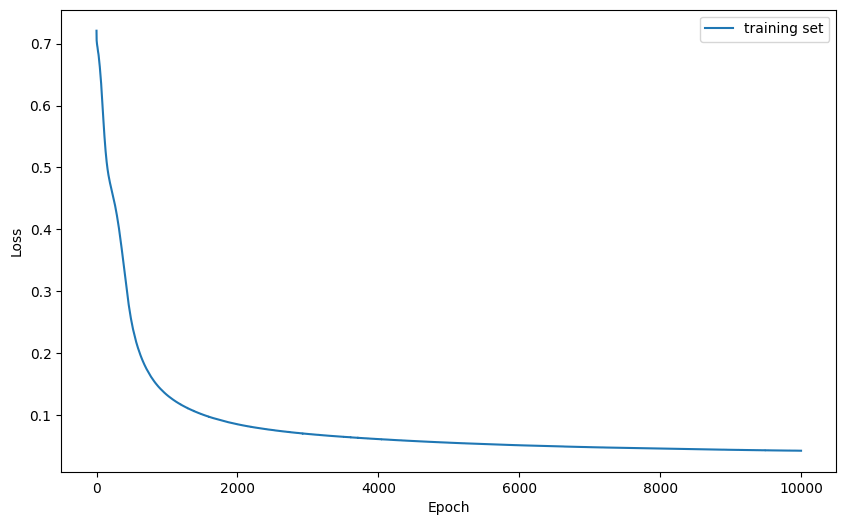

In [144]:
layers = [
    {"output_dim": 10, "activation": "tanh", "init": "xavier"},
    {"output_dim": 10, "activation": "tanh", "init": "xavier"},
    {"output_dim": 2, "activation": "softmax", "init": "normal"}
]

max_epochs = 10000

mlp_xor = networks.MLP(layers, input=train.T, output_type="classification", regularization="l2", regularization_alpha=0.0001)


losses = mlp_xor.train(train.T, y_train.T, max_epochs=max_epochs, batch_size=32, learning_rate=0.01, stochastic_descent=True)

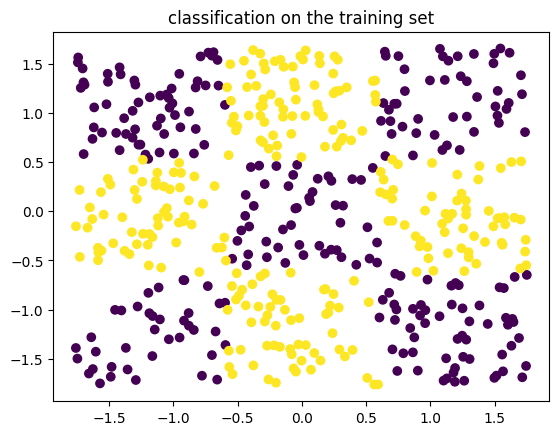

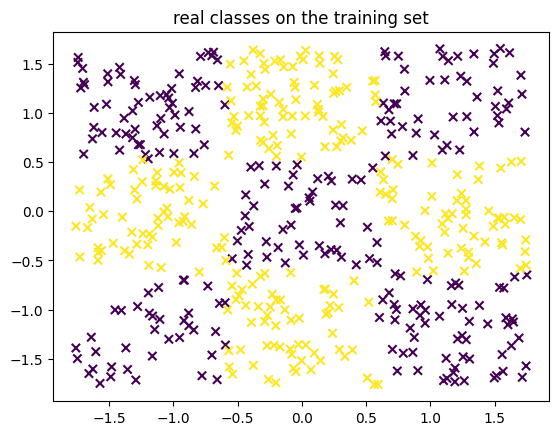

In [146]:
y_hat = mlp_xor.predict(train.T)
plt.scatter(train.x, train.y, c=y_hat)
plt.title("classification on the training set")
plt.show()

plt.scatter(train.x, train.y, c=y_train, marker="x")
plt.title("real classes on the training set")
plt.show()

0

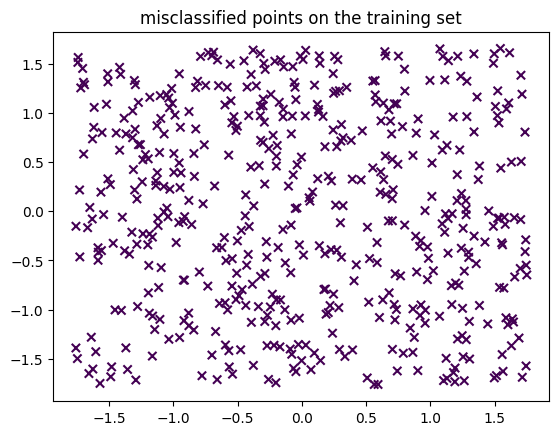

In [147]:
plt.title("misclassified points on the training set")

plt.scatter(train.x, train.y, c=y_hat.flatten() == y_train.flatten(), marker="x")
np.sum(y_hat.flatten() != y_train.flatten())

In [148]:
y_pred = mlp_xor.full_forward_pass(test.T)
print(y_pred.shape)
y_onehot = networks.assets.one_hot(y_test.T, 2)
print("Fscore on test set:", mlp_xor.Fscore(y_pred, y_onehot))

(2, 500)
Fscore on test set: 0.9397966395529943


In [149]:
y_train_pred = mlp_xor.full_forward_pass(train.T)
y_train_onehot = networks.assets.one_hot(y_train.T, 2)
print("Fscore on train set:", mlp_xor.Fscore(y_train_pred, y_train_onehot))

Fscore on train set: 0.9868160348638559


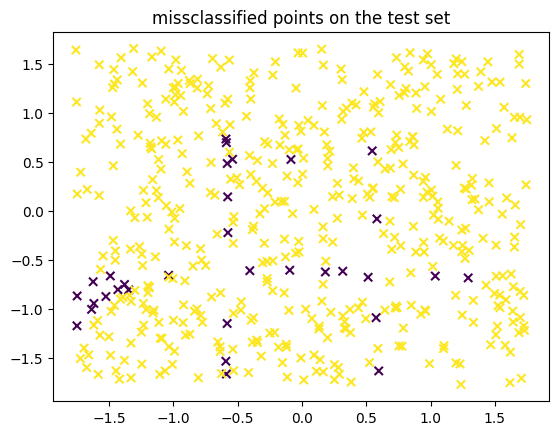

In [15]:
y_pred = mlp_xor.predict(test.T).flatten()
y_test = y_test.flatten()

plt.title("missclassified points on the test set")
plt.scatter(test.x, test.y, c=y_pred == y_test, marker="x")